In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
old_file = 'SD.csv'
old = pd.read_csv(old_file)

file = 'filtered_data.csv'
df = pd.read_csv(file)


print(len(old))
print(len(df))

991346
595460


Summary Statistics

In [20]:
display(df.describe())

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,595460.000000,595460.000000,595460.000000,595460.000000,595460.000000,595460.000000,595460.000000,595460.000000,595460.000000,595460.000000,...,595460.000000,595460.000000,595460.000000,595460.000000,595460.000000,595460.000000,595460.000000,595460.000000,595460.000000,595460.000000
mean,49.531656,161.829594,63.205975,81.238440,0.984240,0.981437,1.022012,1.021271,122.461510,76.805532,...,56.819934,116.761734,137.548368,14.215767,1.091724,0.851967,26.547704,26.265667,39.760392,1.626700
std,7.009128,8.679070,11.778739,9.269496,0.544064,0.538165,0.146721,0.144286,14.289306,9.974158,...,15.046802,36.052788,105.251340,1.581717,0.431582,0.486496,26.584648,26.559756,54.936772,0.817538
min,40.000000,135.000000,30.000000,32.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,45.000000,155.000000,55.000000,75.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,46.000000,93.000000,77.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,50.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,121.000000,77.000000,...,55.000000,115.000000,111.000000,14.200000,1.000000,0.800000,23.000000,21.000000,24.000000,1.000000
75%,55.000000,170.000000,70.000000,87.000000,1.200000,1.200000,1.000000,1.000000,131.000000,83.000000,...,65.000000,139.000000,165.000000,15.300000,1.000000,1.000000,29.000000,30.000000,42.000000,2.000000
max,60.000000,190.000000,130.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,181.000000,...,701.000000,2114.000000,6430.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


Datatypes

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595460 entries, 0 to 595459
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               595460 non-null  object 
 1   age               595460 non-null  int64  
 2   height            595460 non-null  int64  
 3   weight            595460 non-null  int64  
 4   waistline         595460 non-null  float64
 5   sight_left        595460 non-null  float64
 6   sight_right       595460 non-null  float64
 7   hear_left         595460 non-null  float64
 8   hear_right        595460 non-null  float64
 9   SBP               595460 non-null  float64
 10  DBP               595460 non-null  float64
 11  BLDS              595460 non-null  float64
 12  tot_chole         595460 non-null  float64
 13  HDL_chole         595460 non-null  float64
 14  LDL_chole         595460 non-null  float64
 15  triglyceride      595460 non-null  float64
 16  hemoglobin        59

In [21]:
print(df.isnull().sum())
# No null values but in case there were:
df = df.dropna()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64


In [24]:
# Calculate and display outliers using IQR method for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"{col}:")
    print(f"  Outlier count: {len(outliers)}")
    print(f"  Outlier percentage: {len(outliers)/len(df)*100:.2f}%")
    print(f"  Range: [{lower_bound:.2f}, {upper_bound:.2f}]")
    if len(outliers) > 0:
        print(f"  Min outlier: {outliers[col].min():.2f}")
        print(f"  Max outlier: {outliers[col].max():.2f}")
    print()

age:
  Outlier count: 0
  Outlier percentage: 0.00%
  Range: [30.00, 70.00]

height:
  Outlier count: 0
  Outlier percentage: 0.00%
  Range: [132.50, 192.50]

weight:
  Outlier count: 7660
  Outlier percentage: 1.29%
  Range: [32.50, 92.50]
  Min outlier: 30.00
  Max outlier: 130.00

waistline:
  Outlier count: 4416
  Outlier percentage: 0.74%
  Range: [57.00, 105.00]
  Min outlier: 32.00
  Max outlier: 999.00

sight_left:
  Outlier count: 15363
  Outlier percentage: 2.58%
  Range: [0.20, 1.80]
  Min outlier: 0.10
  Max outlier: 9.90

sight_right:
  Outlier count: 15009
  Outlier percentage: 2.52%
  Range: [0.20, 1.80]
  Min outlier: 0.10
  Max outlier: 9.90

hear_left:
  Outlier count: 13107
  Outlier percentage: 2.20%
  Range: [1.00, 1.00]
  Min outlier: 2.00
  Max outlier: 2.00

hear_right:
  Outlier count: 12666
  Outlier percentage: 2.13%
  Range: [1.00, 1.00]
  Min outlier: 2.00
  Max outlier: 2.00

SBP:
  Outlier count: 8781
  Outlier percentage: 1.47%
  Range: [83.50, 159.50]
 

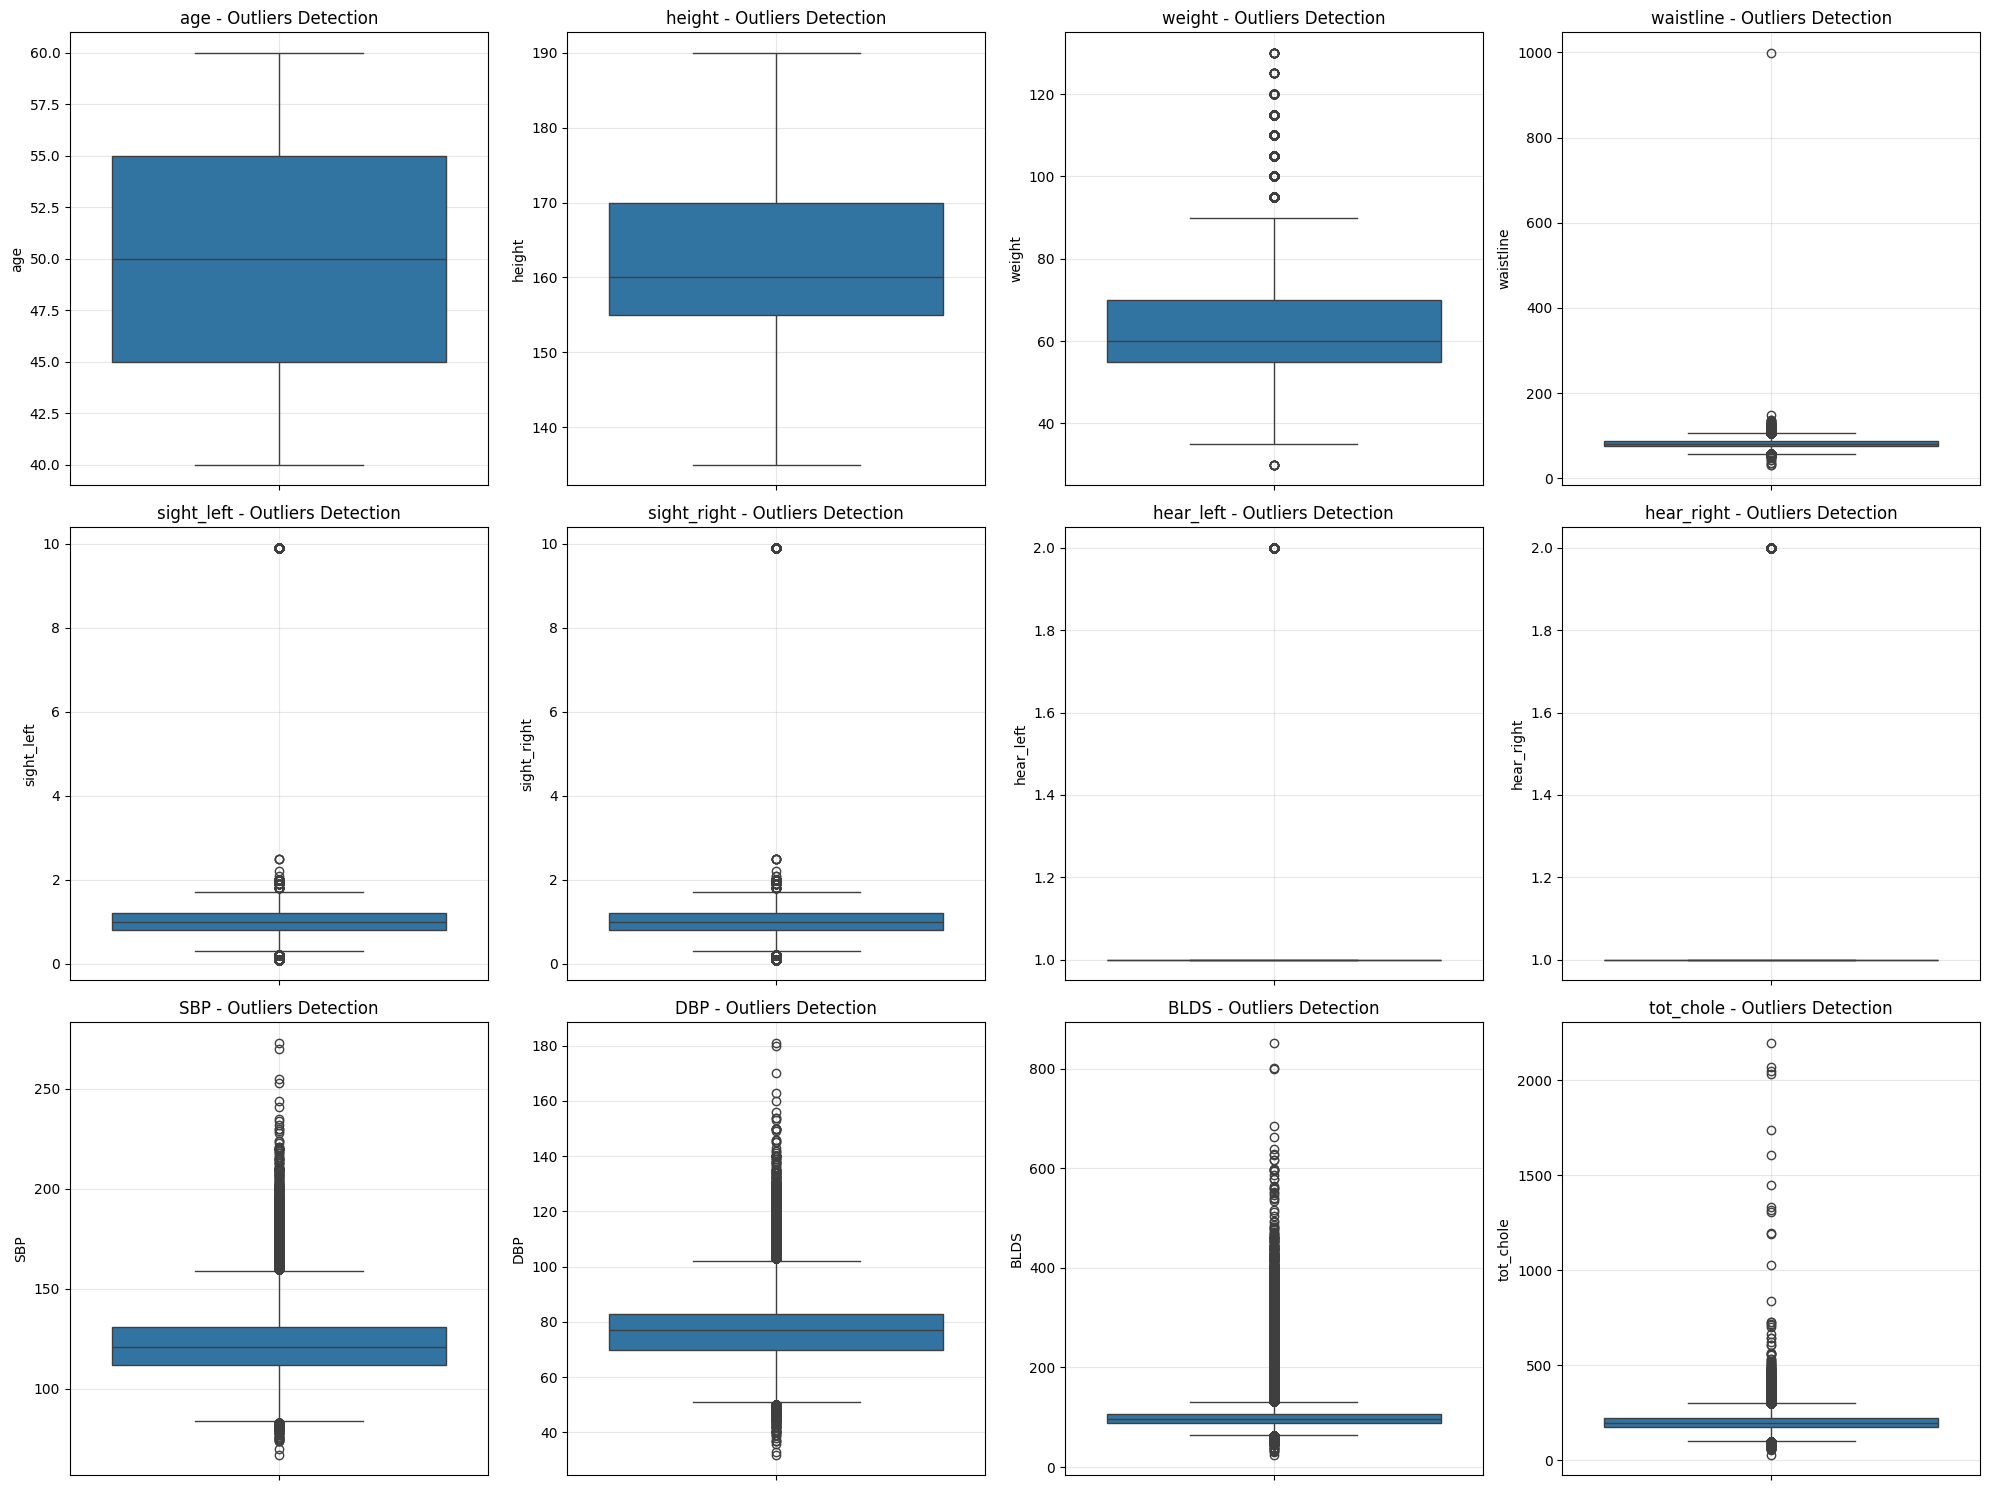

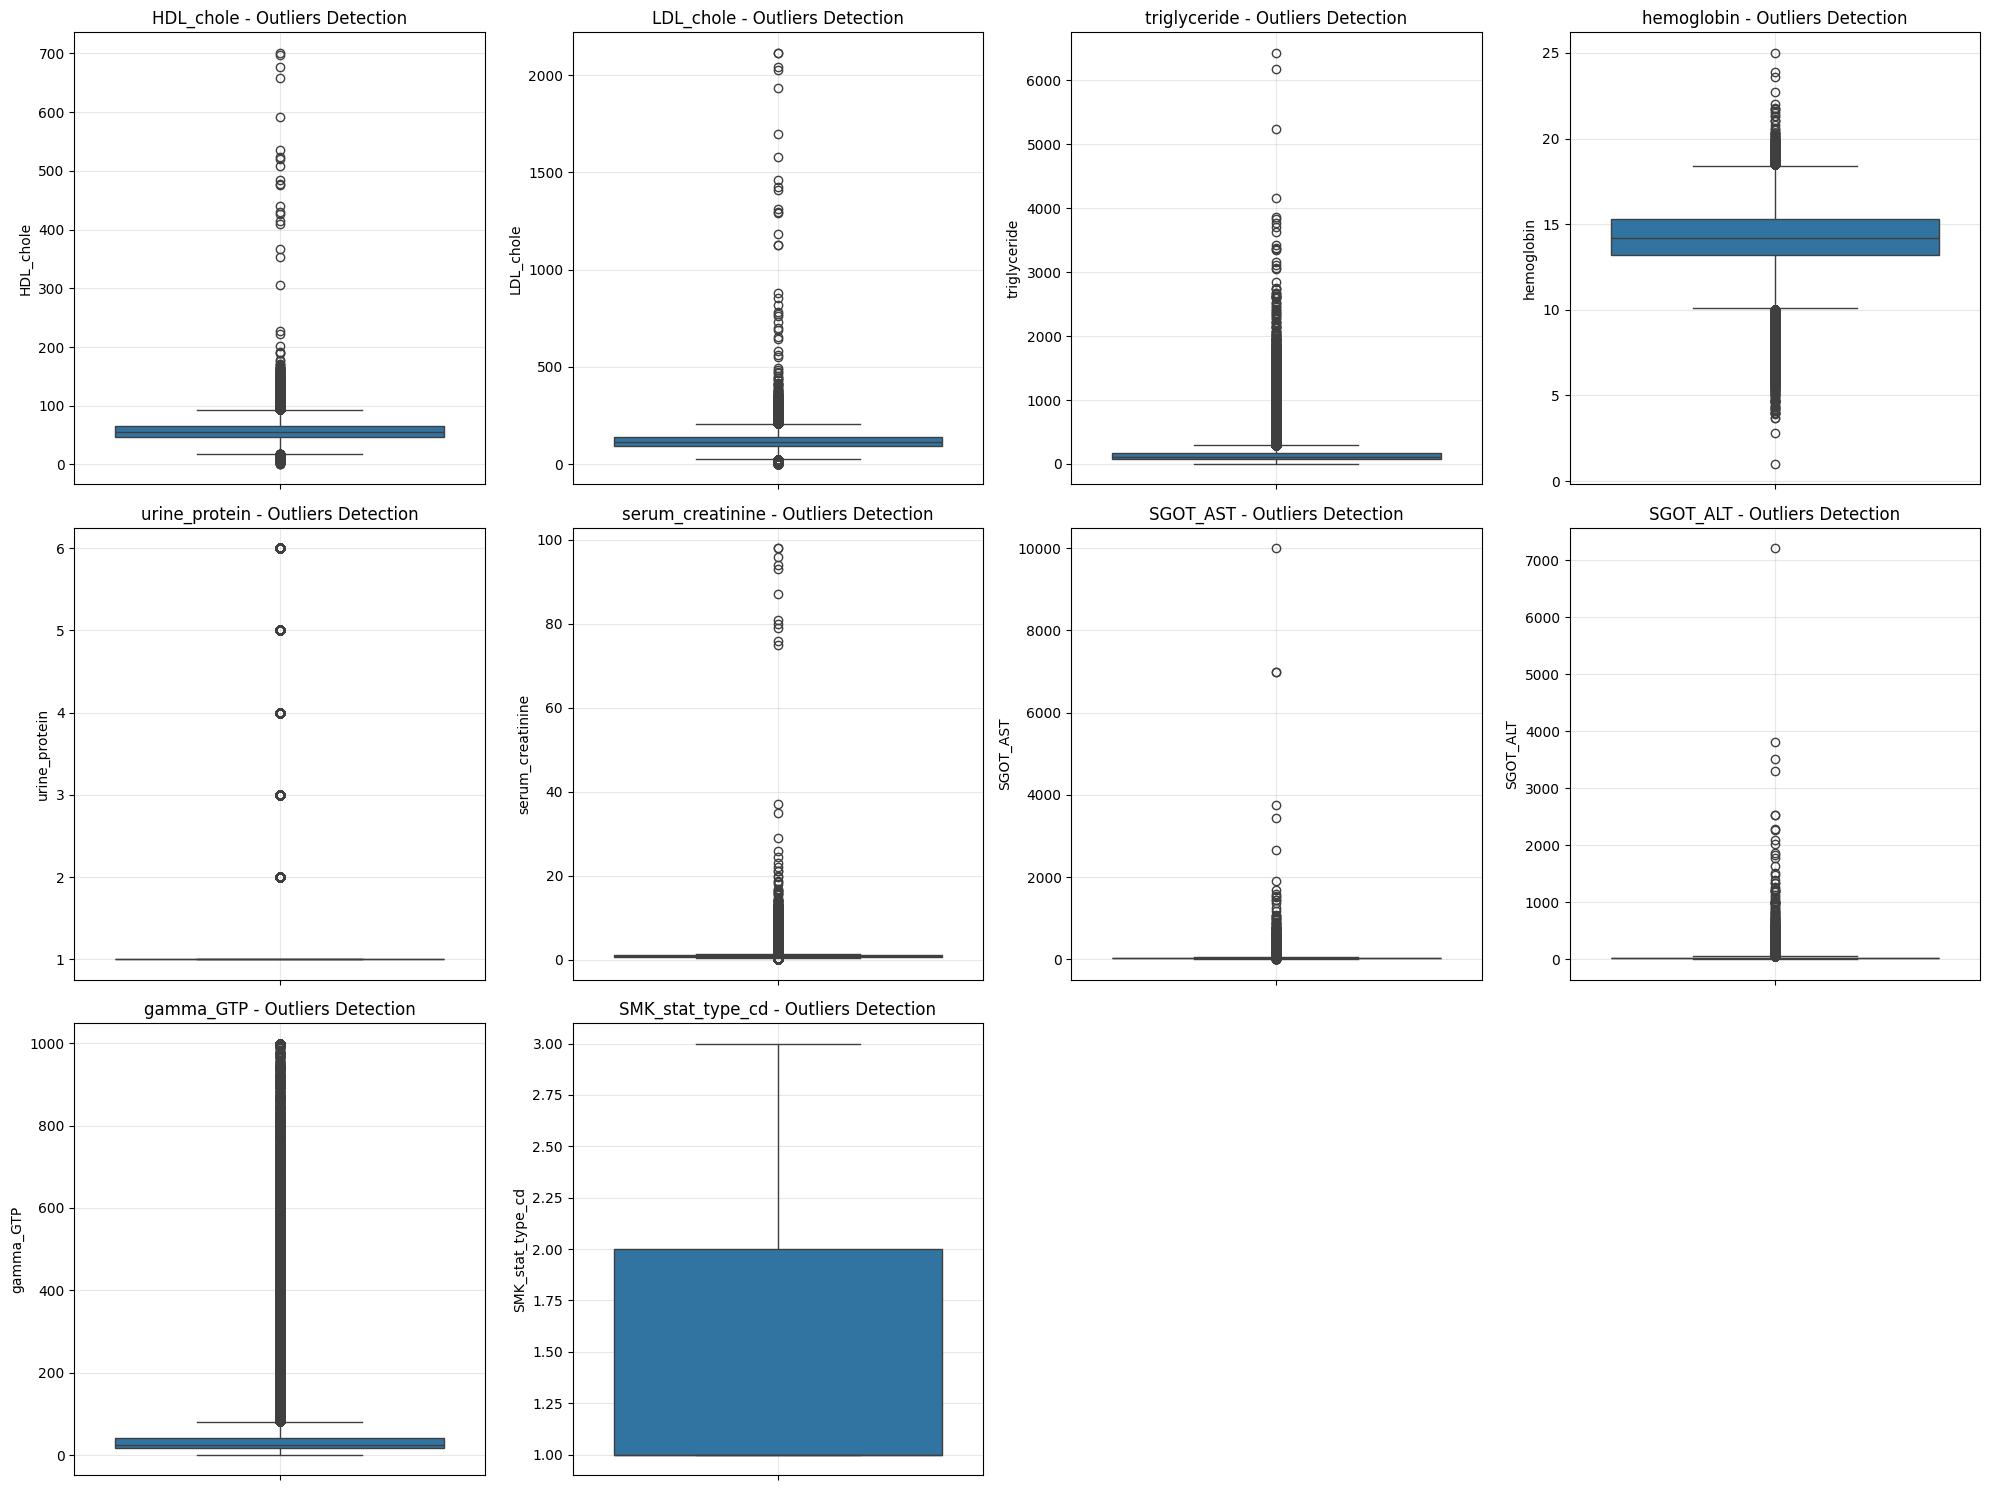

In [25]:
# Create visualizations for outliers
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols[:12]):  # Show first 12 numerical columns
    # Calculate outlier bounds for this column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create box plot
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'{col} - Outliers Detection')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create additional plots for remaining numerical columns if any
if len(numerical_cols) > 12:
    remaining_cols = numerical_cols[12:]
    n_remaining = len(remaining_cols)
    n_cols = 4
    n_rows = (n_remaining + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_remaining == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(remaining_cols):
        sns.boxplot(data=df, y=col, ax=axes[i])
        axes[i].set_title(f'{col} - Outliers Detection')
        axes[i].grid(True, alpha=0.3)
    
    # Hide empty subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()